# PCA Continued

### Standardize Columns <br>
mean = 0 for every column

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.random.randint(1, 10, size=(50, 4))

In [3]:
X.shape

(50, 4)

In [4]:
X[:5]

array([[2, 2, 6, 3],
       [2, 1, 7, 7],
       [6, 3, 7, 6],
       [6, 6, 2, 7],
       [5, 9, 6, 8]])

In [5]:
X[:, 0].mean()

5.26

In [6]:
X.mean(axis = 0)

array([5.26, 4.8 , 4.54, 4.82])

In [7]:
X = X - X.mean(axis=0) # subtracts the column means from the respective columns in X. This centers each column around 0.

In [8]:
X.mean(axis = 0) # columns means are zero now

array([ 2.13162821e-16,  7.10542736e-17,  7.10542736e-17, -2.84217094e-16])

In [9]:
S = np.dot(X.T, X) # Covariance matrix
S

array([[353.62, -68.4 , -33.02,   4.34],
       [-68.4 , 282.  ,  27.4 , -69.8 ],
       [-33.02,  27.4 , 352.42,  22.86],
       [  4.34, -69.8 ,  22.86, 269.38]])

### Dimensionality Reduction

In [10]:
from sklearn.datasets import make_blobs

In [11]:
X, y = make_blobs(n_features=5, centers = 2)  # n_samples=100, x has the data, y has the labels here

In [12]:
X.shape

(100, 5)

In [13]:
X[:5]

array([[-0.35418326, -4.70053515, -2.89679969,  1.81250111,  6.65040342],
       [ 2.39477213, -6.51426042, -1.06856915,  0.78098632,  7.76231437],
       [ 1.23560973, -8.60395542,  3.41292078,  0.2992748 ,  9.93538798],
       [ 1.68604178, -4.21600805, -0.51084742,  0.40587321,  6.6015821 ],
       [ 2.07922799, -4.72906522, -0.99881099, -0.48650077,  5.28510327]])

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components = 2)

In [16]:
X_pca = pca.fit_transform(X)

In [17]:
X_pca[:5]

array([[-6.2967228 ,  2.3088722 ],
       [-3.20982093,  1.24118616],
       [ 1.86057693,  2.60833703],
       [-4.02989971, -0.03255605],
       [-4.30746541, -1.16157029]])

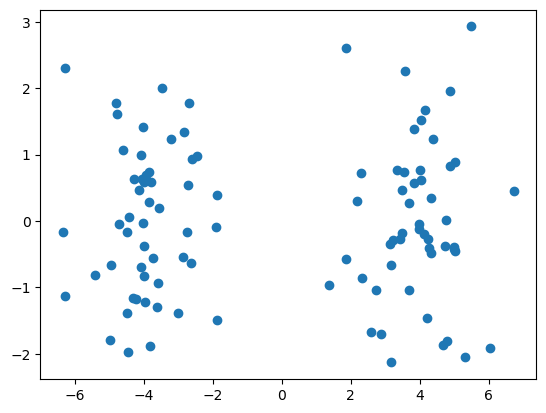

In [18]:
plt.scatter(X_pca[:,0], X_pca[:, 1])
plt.show()

In [19]:
# Provides the ratio of variance explained by each principal component. 
# It gives you information about the amount of data explained by each 
# dimension or principal component.

pca.explained_variance_ratio_

array([0.79015574, 0.06309519])

### PCA - From Scratch

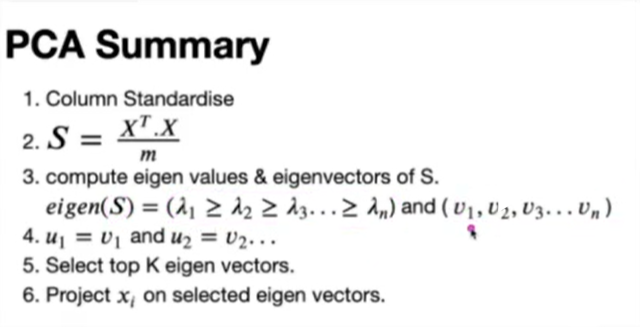

#### Step 1: Column Standardise

In [20]:
X.mean(axis = 0)

array([ 1.88837417, -6.80993062,  2.43494605, -0.83674595,  7.55378122])

In [21]:
X = X - X.mean(axis = 0)

In [23]:
X.mean(axis = 0)

array([ 9.34807787e-16, -5.24025268e-16, -6.03961325e-16,  1.50990331e-16,
       -4.44977388e-15])

#### Step 2: Covariance Matrix

In [25]:
S = np.dot(X.T, X)
S.shape

(5, 5)

#### Step 3: Compute Eigen Values and Eigenvectors of S

In [26]:
# Most powerful. eigen value decomposition
lambdas, vectors = np.linalg.eig(S)

In [27]:
lambdas.shape

(5,)

In [28]:
lambdas

array([1630.4719701 ,   84.77656816,  101.35925713,  130.1957826 ,
        116.67820013])

In [29]:
vectors.shape

(5, 5)

In [30]:
vectors # each column is one eigenvector. 
# Let's say we want to reduce this to 2 vectors. Then, the other 3 vectors will be projected on the first two.

array([[ 0.13981779, -0.73358637, -0.40212476, -0.4555611 , -0.27029942],
       [-0.44560153, -0.36004322,  0.65769584, -0.34390478,  0.34781293],
       [ 0.85616399, -0.04760426,  0.50429519, -0.10178117, -0.00663429],
       [-0.11650254, -0.44294279,  0.29073239,  0.69812092, -0.46725871],
       [ 0.18788466, -0.3657259 , -0.2586366 ,  0.42007304,  0.76654398]])

#### Step 4: Select top k eigen vectors

In [31]:
U = vectors[:,:2]
U

array([[ 0.13981779, -0.73358637],
       [-0.44560153, -0.36004322],
       [ 0.85616399, -0.04760426],
       [-0.11650254, -0.44294279],
       [ 0.18788466, -0.3657259 ]])

In [32]:
U.shape

(5, 2)

In [33]:
X.shape

(100, 5)

#### Step 5: Project xi on selected eigen vectors

In [42]:
X_scratch = np.dot(X, U) # Data from scratch

In [43]:
X_scratch.shape

(100, 2)

In [44]:
X_scratch[:5]

array([[-6.2967224 ,  0.29637367],
       [-3.2098207 , -1.1039872 ],
       [ 1.8605769 , -0.29597777],
       [-4.0298996 , -0.847429  ],
       [-4.3074656 , -0.05117208]], dtype=float32)

In [38]:
X_pca[:5]

array([[-6.2967228 ,  2.3088722 ],
       [-3.20982093,  1.24118616],
       [ 1.86057693,  2.60833703],
       [-4.02989971, -0.03255605],
       [-4.30746541, -1.16157029]])

There is a slight difference in the second vector between the sklearn implementation and my scratch implementation

While the exact values may differ slightly from the results obtained using sklearn, the overall dimensionality reduction and the relative positions of the transformed data points are similar. Therefore, the scratch implementation can be considered correct.

### Explained Variance

In [54]:
X, y = make_blobs(n_features = 100, centers = 2)

In [55]:
pca = PCA()

In [56]:
x_pca = pca.fit_transform(X)

In [57]:
pca.explained_variance_ratio_

array([9.37773283e-01, 2.38287347e-03, 2.23412589e-03, 2.11559823e-03,
       2.02066529e-03, 1.95974627e-03, 1.89230554e-03, 1.83083242e-03,
       1.76420971e-03, 1.73288331e-03, 1.63847853e-03, 1.61647137e-03,
       1.54561157e-03, 1.52398355e-03, 1.45850476e-03, 1.39774174e-03,
       1.38478304e-03, 1.34314125e-03, 1.30520182e-03, 1.27436598e-03,
       1.24523955e-03, 1.17229849e-03, 1.15944993e-03, 1.13551780e-03,
       1.08789608e-03, 1.02878732e-03, 1.02165318e-03, 9.64994741e-04,
       9.33150806e-04, 9.00199927e-04, 8.73602758e-04, 8.38221431e-04,
       7.97988306e-04, 7.85096973e-04, 7.65929442e-04, 7.47236886e-04,
       7.18709851e-04, 6.96198633e-04, 6.34150990e-04, 6.23492638e-04,
       6.02333365e-04, 5.91877732e-04, 5.66153829e-04, 5.57937860e-04,
       5.28816938e-04, 4.89005341e-04, 4.70157683e-04, 4.63974292e-04,
       4.52081254e-04, 4.06219613e-04, 3.92426184e-04, 3.89390997e-04,
       3.67009243e-04, 3.60014109e-04, 3.57835730e-04, 3.13691596e-04,
      

In [58]:
pca.explained_variance_ratio_.sum()

0.9999999999999998

In [59]:
information = np.cumsum(pca.explained_variance_ratio_)
information

array([0.93777328, 0.94015616, 0.94239028, 0.94450588, 0.94652655,
       0.94848629, 0.9503786 , 0.95220943, 0.95397364, 0.95570652,
       0.957345  , 0.95896147, 0.96050708, 0.96203107, 0.96348957,
       0.96488731, 0.9662721 , 0.96761524, 0.96892044, 0.97019481,
       0.97144005, 0.97261234, 0.97377179, 0.97490731, 0.97599521,
       0.977024  , 0.97804565, 0.97901064, 0.97994379, 0.98084399,
       0.9817176 , 0.98255582, 0.98335381, 0.9841389 , 0.98490483,
       0.98565207, 0.98637078, 0.98706698, 0.98770113, 0.98832462,
       0.98892696, 0.98951883, 0.99008499, 0.99064293, 0.99117174,
       0.99166075, 0.99213091, 0.99259488, 0.99304696, 0.99345318,
       0.99384561, 0.994235  , 0.99460201, 0.99496202, 0.99531986,
       0.99563355, 0.99593778, 0.99623772, 0.99651438, 0.99678413,
       0.99704252, 0.99728175, 0.99749409, 0.99769925, 0.99789344,
       0.99808268, 0.99824738, 0.99840355, 0.99855273, 0.99869105,
       0.99882086, 0.99894137, 0.9990561 , 0.99916212, 0.99925

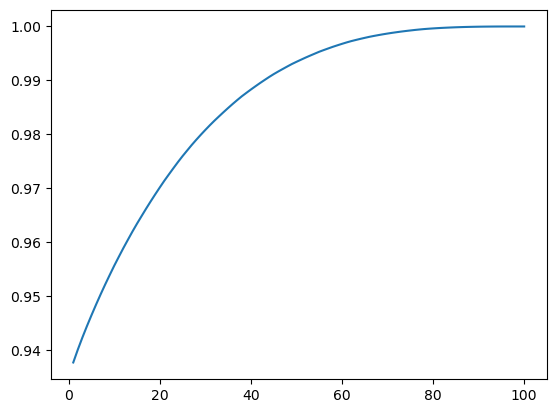

In [60]:
plt.plot(range(1,101), information)

<strong>If you have any questions, connect with me here:</strong> https://www.linkedin.com/in/khushalkumar/